In [2]:
from io import BytesIO
import IPython
import json
import os
from PIL import Image
import requests
import time
from dotenv import load_dotenv

In [3]:
load_dotenv()

sd_key = os.getenv('SD_KEY')

In [4]:
host = "https://api.stability.ai/v2beta/stable-image/generate/sd3"

In [6]:
prompt = "a futuristic robot playing ice hockey.  The robot is metal with silver, gray, and black coloring.  It has glowing blue eyes"
negative_prompt = "" 
aspect_ratio = "5:4"  #21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21
seed = 0 
output_format = "png" 


params = {
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format": output_format
}

In [7]:
response = requests.post(
    host,
    headers={
        "authorization": f"Bearer {sd_key}",
        "accept": "image/*"
    },
    files={"none": ''},
    data=params
)

In [8]:
print(response)

<Response [200]>


Saved image generated_2796993429.png
Result image:


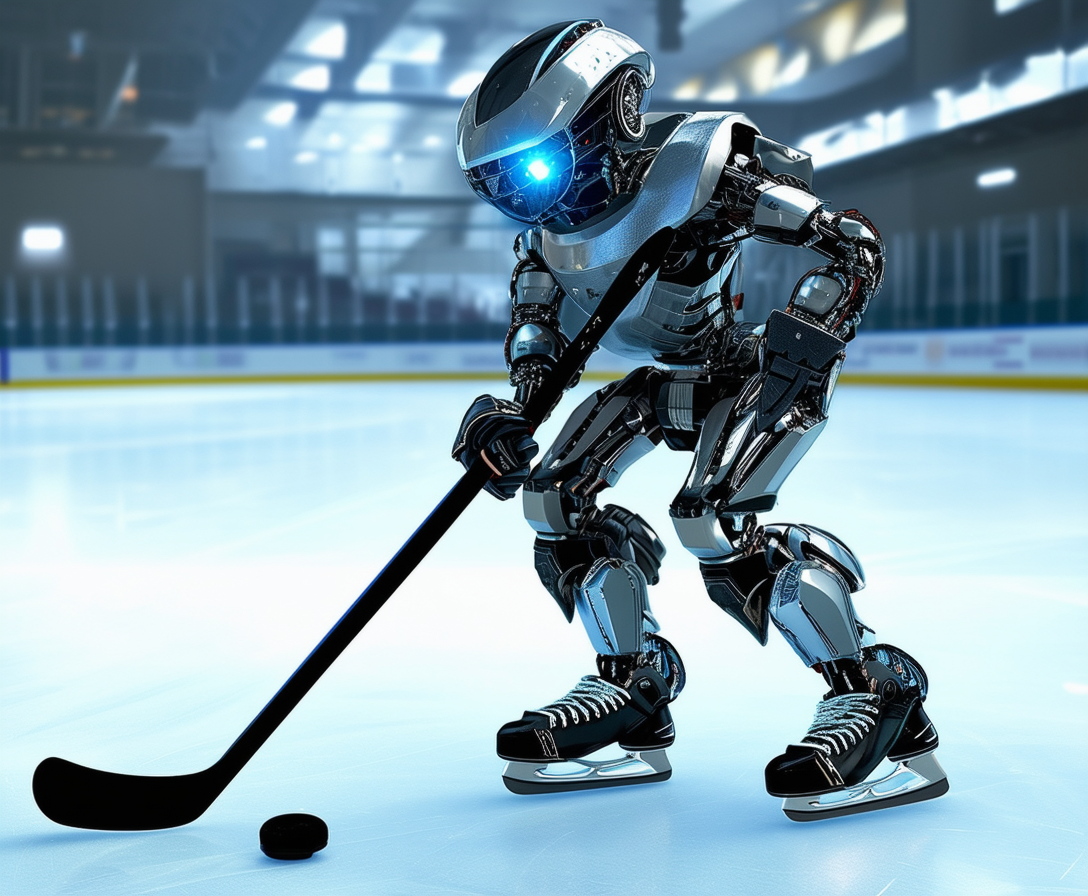

In [9]:
output_image = response.content

seed = response.headers.get("seed")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")


print("Result image:")
IPython.display.display(Image.open(generated))